In [1]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
# NLP packages
import nltk 
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Data Overview

### Importing Data

In [4]:
# Reading data from .csv file
Reviews = pd.read_csv('DatafinitiElectronicsProductData.csv')

In [5]:
Reviews.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


### Data Exploration

In [6]:
Reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   asins                7299 non-null   object 
 2   brand                7299 non-null   object 
 3   categories           7299 non-null   object 
 4   colors               5280 non-null   object 
 5   dateAdded            7299 non-null   object 
 6   dateUpdated          7299 non-null   object 
 7   dimension            6090 non-null   object 
 8   ean                  2951 non-null   float64
 9   imageURLs            7299 non-null   object 
 10  keys                 7299 non-null   object 
 11  manufacturer         4632 non-null   object 
 12  manufacturerNumber   7299 non-null   object 
 13  name                 7299 non-null   object 
 14  primaryCategories    7299 non-null   object 
 15  reviews.date         7238 non-null   o

In [7]:
display(Reviews.describe().round(2))

,ean,reviews.numHelpful,reviews.rating,upc
count,2.951000e+03,5813.00,7135.00,7.299000e+03
mean,2.986492e+11,0.75,4.37,3.866713e+11
std,3.385510e+11,3.42,1.04,3.681693e+11
min,2.710811e+10,0.00,1.00,1.781766e+10
25%,9.785510e+10,0.00,4.00,5.003633e+10
50%,9.785510e+10,0.00,5.00,9.785510e+10
75%,6.490000e+11,0.00,5.00,7.930000e+11
max,8.900000e+11,128.00,5.00,8.900000e+11


### Checking Missing Values

In [8]:
Reviews.isnull().any()

id                     False
asins                  False
brand                  False
categories             False
colors                  True
dateAdded              False
dateUpdated            False
dimension               True
ean                     True
imageURLs              False
keys                   False
manufacturer            True
manufacturerNumber     False
name                   False
primaryCategories      False
reviews.date            True
reviews.dateSeen       False
reviews.doRecommend     True
reviews.numHelpful      True
reviews.rating          True
reviews.sourceURLs     False
reviews.text            True
reviews.title           True
reviews.username       False
sourceURLs             False
upc                    False
weight                 False
dtype: bool

In [9]:
Reviews.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
ean                    4348
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
primaryCategories         0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend    1391
reviews.numHelpful     1486
reviews.rating          164
reviews.sourceURLs        0
reviews.text              5
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

In [10]:
# replace missing values with zero
Reviews['reviews.numHelpful'] = Reviews['reviews.numHelpful'].fillna(0)
Reviews['reviews.rating'] = Reviews['reviews.rating'].fillna(0)

In [11]:
Reviews.isna().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
ean                    4348
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
primaryCategories         0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend    1391
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              5
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

In [12]:
# Drop null values of unnecessary columns
Reviews.dropna(how = 'any', inplace = True)

In [13]:
Reviews.isnull().sum()

id                     0
asins                  0
brand                  0
categories             0
colors                 0
dateAdded              0
dateUpdated            0
dimension              0
ean                    0
imageURLs              0
keys                   0
manufacturer           0
manufacturerNumber     0
name                   0
primaryCategories      0
reviews.date           0
reviews.dateSeen       0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.sourceURLs     0
reviews.text           0
reviews.title          0
reviews.username       0
sourceURLs             0
upc                    0
weight                 0
dtype: int64

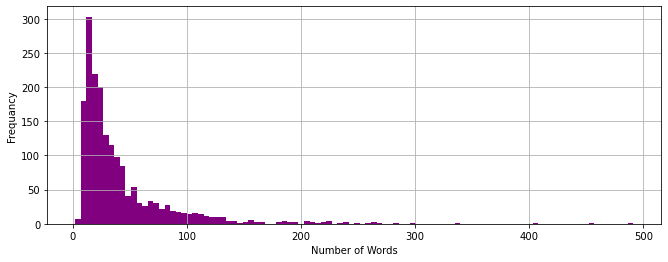

In [14]:
# Getting the number of words by splitting them by a space
numof_words_per_review = Reviews['reviews.text'].apply(lambda x: len(x.split(" ")))
numof_words_per_review.hist(bins=100, color='Purple', figsize=(11, 4))
plt.xlabel('Number of Words')
plt.ylabel('Frequancy')
plt.show() 

In [15]:
print('Average words:', numof_words_per_review.mean())
print('Skewness:', numof_words_per_review.skew())

Average words: 41.13055555555555
Skewness: 3.5032595217548295


In [16]:
Reviews['reviews.rating'].value_counts()

5.0    1102
4.0     469
3.0     114
2.0      58
1.0      57
Name: reviews.rating, dtype: int64

In [17]:
# calculating the rating percentage
rating_percentVal = 100* Reviews['reviews.rating'].value_counts()/len(Reviews)
rating_percentVal

5.0    61.222222
4.0    26.055556
3.0     6.333333
2.0     3.222222
1.0     3.166667
Name: reviews.rating, dtype: float64

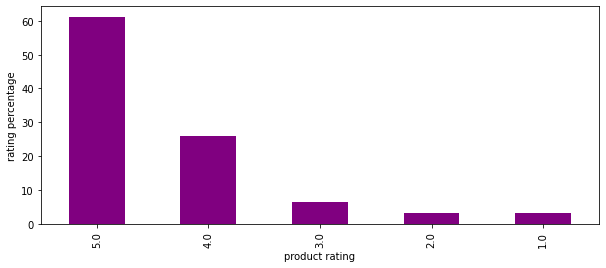

In [18]:
rating_percentVal.plot.bar(figsize=(10,4),color='Purple')
plt.xlabel('product rating')
plt.ylabel('rating percentage')
plt.show()

### Pre processing 

In [19]:
# Converting all words into lower case
Reviews['lowercase_text_reviews'] = Reviews['reviews.text'].str.lower()
print(Reviews['lowercase_text_reviews'])

0       this keyboard is very easy to type on, but the...
1       it's thin and light. i can type pretty easily ...
2       i love the new design the keys are spaced well...
3       attached easily and firmly. has a nice feel. a...
4       our original keyboard was okay, but did not ha...
                              ...                        
7287    best feature is being rechargableworks nice, t...
7288    i'm still trying to learn all the features of ...
7289     great sound system would definitely recommend...
7290    i hated my cable company bulky remote control ...
7291    we were forced to add a cable box as charter c...
Name: lowercase_text_reviews, Length: 1800, dtype: object


In [20]:
# Count unique words that are found in reviews
from nltk import word_tokenize

In [21]:
# Number of tokens before converting reviews to lowercase
token_lists = [word_tokenize(each) for each in Reviews['reviews.text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# Number of tokens after converting reviews to lowercase
token_lists_lower = [word_tokenize(each) for each in Reviews['lowercase_text_reviews']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  5715
Number of unique tokens now:  4856


In [22]:
# removing special characters
remove_spl_chars = Reviews['lowercase_text_reviews'].apply(lambda review: [char for char in list(review) if not char.isalnum() and char != ' '])
flat_list = [item for sublist in remove_spl_chars for item in sublist]
 
# Create a set containing special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '?',
 '@',
 ']',
 '~',
 '–',
 '’',
 '…'}

In [23]:
Review2 = Reviews ['lowercase_text_reviews'].copy()
Reviews['lowercase_text_reviews'] = Reviews['lowercase_text_reviews'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

<ipython-input-23-ec3d2bbc55a6>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [24]:
# Checking outcomes
print(Reviews['lowercase_text_reviews'][0])

this keyboard is very easy to type on  but the fingerprint reader is the best feature  it is very accurate and simplifies login 


In [25]:
token_lists = [word_tokenize(each) for each in Review2]

tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

token_lists = [word_tokenize(each) for each in Reviews['lowercase_text_reviews']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens then:  4856
Number of unique tokens now:  4464


In [26]:
print('All Languages in NLTK: \n')
print(stopwords.fileids())

All Languages in NLTK: 

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [27]:
# clean noise words
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
# seperating stopwords and non-stopwords from the reviews
stop_words = set(eng_stop_words)
del_stop_words = []
stopword = []

# using review number 0 as an example
sentence = Reviews['lowercase_text_reviews'][1] 

# tokenize a sentence to the seperate tokens
words = nltk.word_tokenize(sentence)

# Adding words into different array, stopwords and without stopwords(del_stop_words)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        del_stop_words.append(word)
        
print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', del_stop_words)

-- Original Sentence --
 it s thin and light  i can type pretty easily on it 

-- Stopwords in the sentence --
 ['it', 's', 'and', 'i', 'can', 'on', 'it']

-- Non-stopwords in the sentence --
 ['thin', 'light', 'type', 'pretty', 'easily']


In [29]:
# Removing these words to give more focus to the important information

def remove_stopwords(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

Reviews['withoutstop_reviews_text'] = Reviews['lowercase_text_reviews'].apply(lambda row: remove_stopwords(stop_words, row))
Reviews[['lowercase_text_reviews','withoutstop_reviews_text']]

,lowercase_text_reviews,withoutstop_reviews_text
0,this keyboard is very easy to type on but the...,"[keyboard, easy, type, fingerprint, reader, be..."
1,it s thin and light i can type pretty easily ...,"[thin, light, type, pretty, easily]"
2,i love the new design the keys are spaced well...,"[love, new, design, keys, spaced, well, mis, t..."
3,attached easily and firmly has a nice feel a...,"[attached, easily, firmly, nice, feel, must, s..."
4,our original keyboard was okay but did not ha...,"[original, keyboard, okay, laptop, feel, bit, ..."
...,...,...
7287,best feature is being rechargableworks nice t...,"[best, feature, rechargableworks, nice, touch,..."
7288,i m still trying to learn all the features of ...,"[still, trying, learn, features, controller, t..."
7289,great sound system would definitely recommend,"[great, sound, system, would, definitely, reco..."
7290,i hated my cable company bulky remote control ...,"[hated, cable, company, bulky, remote, control..."


### Stemming & lemmatization

In [30]:
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lingzhang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# defining stemSentence() function to do data stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

Reviews['stemmed_reviews_text'] = Reviews['withoutstop_reviews_text'].apply(lambda x: [stemSentence(y) for y in x])
Reviews[['withoutstop_reviews_text','stemmed_reviews_text']]

,withoutstop_reviews_text,stemmed_reviews_text
0,"[keyboard, easy, type, fingerprint, reader, be...","[keyboard , easi , type , fingerprint , reader..."
1,"[thin, light, type, pretty, easily]","[thin , light , type , pretti , easili ]"
2,"[love, new, design, keys, spaced, well, mis, t...","[love , new , design , key , space , well , mi..."
3,"[attached, easily, firmly, nice, feel, must, s...","[attach , easili , firmli , nice , feel , must..."
4,"[original, keyboard, okay, laptop, feel, bit, ...","[origin , keyboard , okay , laptop , feel , bi..."
...,...,...
7287,"[best, feature, rechargableworks, nice, touch,...","[best , featur , rechargablework , nice , touc..."
7288,"[still, trying, learn, features, controller, t...","[still , tri , learn , featur , control , thin..."
7289,"[great, sound, system, would, definitely, reco...","[great , sound , system , would , definit , re..."
7290,"[hated, cable, company, bulky, remote, control...","[hate , cabl , compani , bulki , remot , contr..."


In [32]:
# defining lemmSentence() function to do data lemmatization 
def lemmSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

Reviews['lemma_reviews_text'] = Reviews['withoutstop_reviews_text'].apply(lambda x: [lemmSentence(y) for y in x])
Reviews[['withoutstop_reviews_text','lemma_reviews_text']]

,withoutstop_reviews_text,lemma_reviews_text
0,"[keyboard, easy, type, fingerprint, reader, be...","[keyboard , easy , type , fingerprint , reader..."
1,"[thin, light, type, pretty, easily]","[thin , light , type , pretty , easily ]"
2,"[love, new, design, keys, spaced, well, mis, t...","[love , new , design , key , space , well , mi..."
3,"[attached, easily, firmly, nice, feel, must, s...","[attach , easily , firmly , nice , feel , must..."
4,"[original, keyboard, okay, laptop, feel, bit, ...","[original , keyboard , okay , laptop , feel , ..."
...,...,...
7287,"[best, feature, rechargableworks, nice, touch,...","[best , feature , rechargableworks , nice , to..."
7288,"[still, trying, learn, features, controller, t...","[still , try , learn , feature , controller , ..."
7289,"[great, sound, system, would, definitely, reco...","[great , sound , system , would , definitely ,..."
7290,"[hated, cable, company, bulky, remote, control...","[hat , cable , company , bulky , remote , cont..."


### Data Visualization 

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


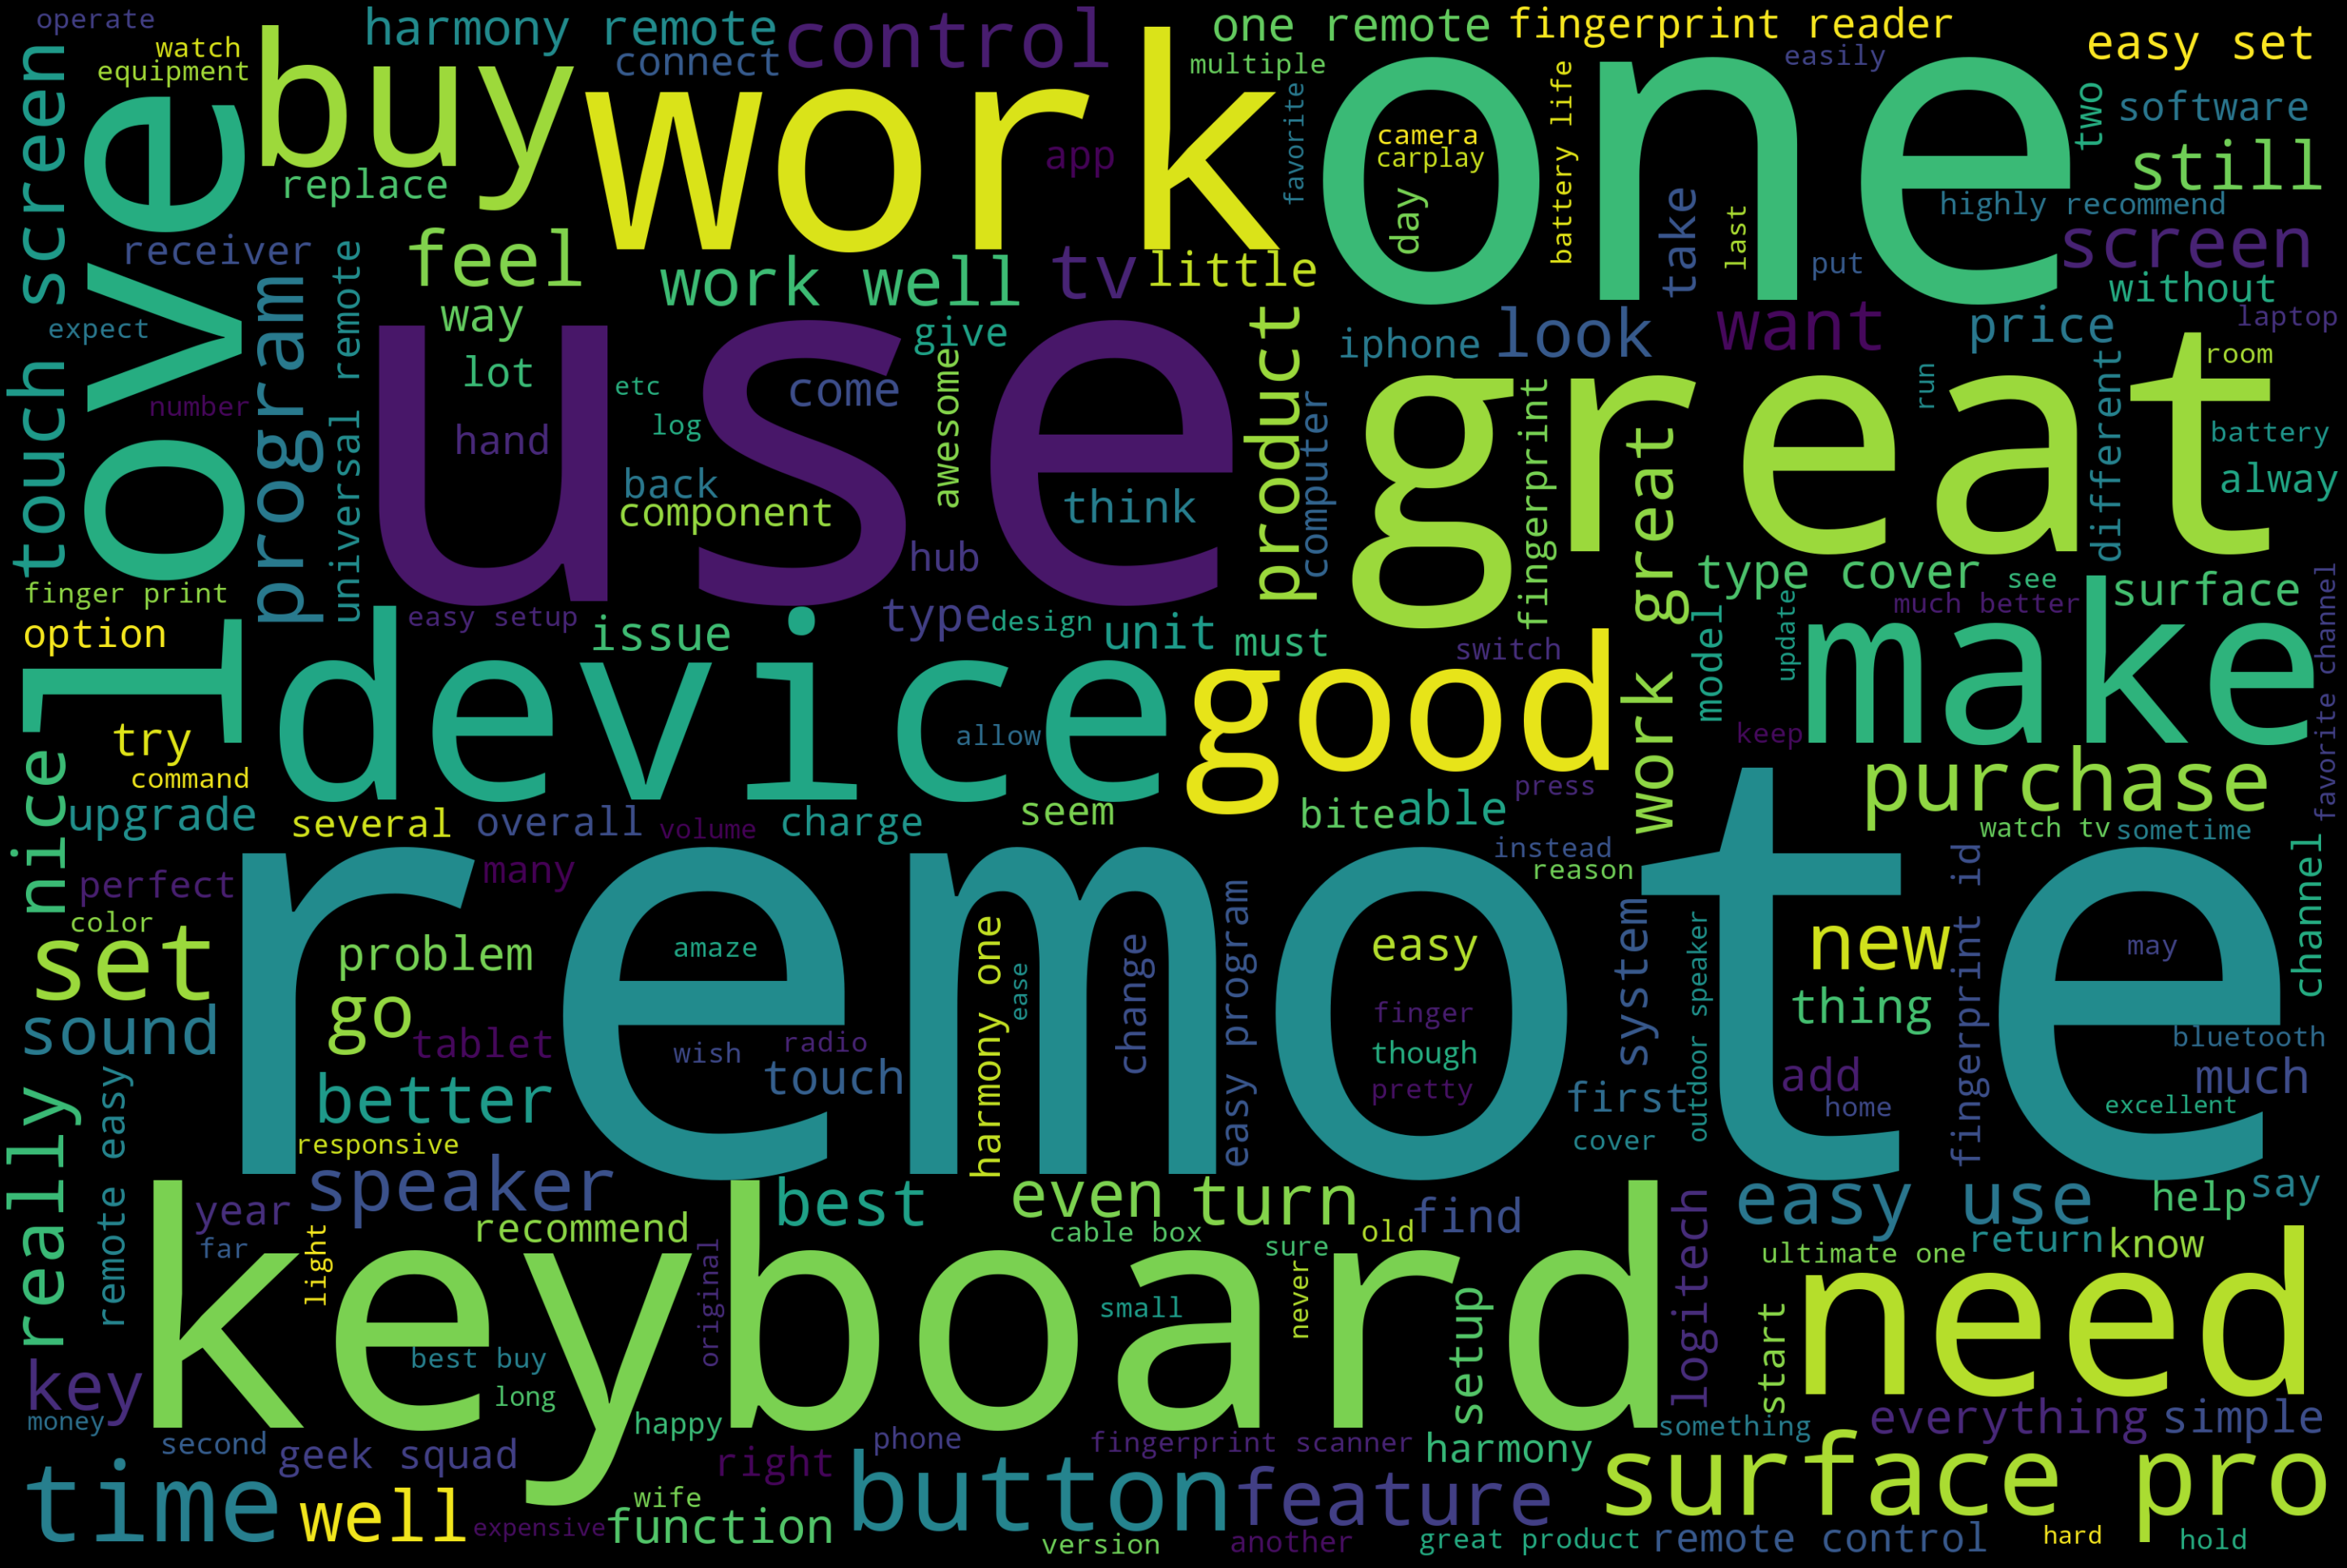

In [34]:
text_word_cloud = ''.join(str (l) for l in Reviews['lemma_reviews_text'])

wc = WordCloud( 
                width = 3000,
                height = 2000,).generate(text_word_cloud)

plt.figure(
            figsize = (40, 30),
            facecolor = 'k',
            edgecolor = 'k')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Standardization the Ratings

In [35]:
# This function returns sentiment value based on the overall ratings from the user
    
Reviews['Sentiment_rating'] = np.where(Reviews['reviews.rating'] > 3,1,0)

# Removing neutral reviews. 
Reviews = Reviews[Reviews['reviews.rating'] != 3]

# Printing the counts of each class
Reviews['Sentiment_rating'].value_counts()

1    1571
0     115
Name: Sentiment_rating, dtype: int64

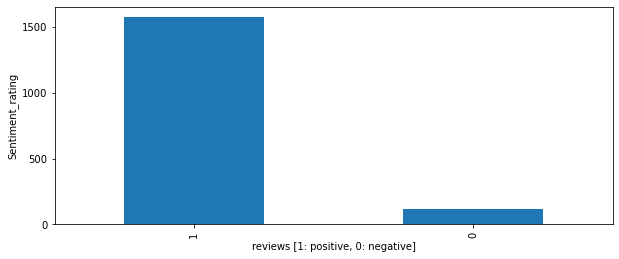

In [36]:
Reviews.Sentiment_rating.value_counts().plot.bar(figsize=(10,4))
plt.xlabel('reviews [1: positive, 0: negative]')
plt.ylabel('Sentiment_rating')

#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

plt.show()

In [37]:
print (text_word_cloud)

['keyboard ', 'easy ', 'type ', 'fingerprint ', 'reader ', 'best ', 'feature ', 'accurate ', 'simplify ', 'login ']['thin ', 'light ', 'type ', 'pretty ', 'easily ']['love ', 'new ', 'design ', 'key ', 'space ', 'well ', 'mis ', 'type ', 'finger ', 'print ', 'recognition ', 'work ', 'ok ', 'use ', 'surface ', 'pro ', '3 ']['attach ', 'easily ', 'firmly ', 'nice ', 'feel ', 'must ', 'surface ', 'pro ']['original ', 'keyboard ', 'okay ', 'laptop ', 'feel ', 'bite ', 'floppy ', 'new ', 'one ', 'solid ', 'feel ', 'key ', 'laptop ', 'like ']['purchase ', 'replace ', 'original ', 'surface ', 'pro ', '3 ', 'keyboard ', 'much ', 'better ', 'feel ', 'fingerprint ', 'reader ', 'handy ', 'feature ']['find ', 'comfortable ', 'type ', 'rarely ', 'use ', 'fingerprint ', 'id ']['good ', 'keyboard ', 'addition ', 'surface ', 'pro ', 'platform ', 'desire ', 'fingerprint ', 'scanner ', 'access ', 'use ', 'surface ', 'pro ', 'keyboard ', 'without ', 'fingerprint ', 'scanner ', 'work ', 'fine ']['tough ',

### Bag of Words Model

In [38]:
Reviews['lowercase_text_reviews'][0]

'this keyboard is very easy to type on  but the fingerprint reader is the best feature  it is very accurate and simplifies login '

In [39]:
#create word doc matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
#convert token counts
vec = CountVectorizer()
X = vec.fit_transform(Reviews['lowercase_text_reviews'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
print(df)    

      00  0001  000224  007  04  10  100  1000  1004  100x  ...  yours  \
0      0     0       0    0   0   0    0     0     0     0  ...      0   
1      0     0       0    0   0   0    0     0     0     0  ...      0   
2      0     0       0    0   0   0    0     0     0     0  ...      0   
3      0     0       0    0   0   0    0     0     0     0  ...      0   
4      0     0       0    0   0   0    0     0     0     0  ...      0   
...   ..   ...     ...  ...  ..  ..  ...   ...   ...   ...  ...    ...   
1681   0     0       0    0   0   0    0     0     0     0  ...      0   
1682   0     0       0    0   0   0    0     0     0     0  ...      0   
1683   0     0       0    0   0   0    0     0     0     0  ...      0   
1684   0     0       0    0   0   0    0     0     0     0  ...      0   
1685   0     0       0    0   0   1    0     0     0     0  ...      0   

      yourself  yr  yrs  zero  zip  zone  zones  zoom  zx  
0            0   0    0     0    0     0      0    

In [40]:
bagofwords_counts = CountVectorizer(tokenizer = word_tokenize,
                                    stop_words = noise_words,
                                    ngram_range = (1,1),
                                    max_features=500)
# Fitting and transforming 
bagofwords_cl_data = bagofwords_counts.fit_transform(Reviews['lowercase_text_reviews'])

bagofwords_cl_data

<1686x500 sparse matrix of type '<class 'numpy.int64'>'
	with 41729 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
import sklearn.linear_model as lm

In [42]:
X_train, X_test, y_train, y_test = train_test_split(bagofwords_cl_data,
                                                    Reviews['Sentiment_rating'],
                                                    test_size = 0.2,
                                                    random_state = 0)

### Applying Linear Support Vector Machine to Bag of Words

In [43]:
from sklearn.svm import LinearSVC

In [44]:
# Defining and training the model
clf_model_all_new = LinearSVC()
clf_model_all_new.fit(X_train, y_train)

LinearSVC()

In [45]:
test_pred_clf_all = clf_model_all_new.predict(X_test)

print("f1 score: ", f1_score(y_test,test_pred_clf_all))

f1 score:  0.9534510433386837


### Apply Logistic Regression to Bag of Words 

In [46]:
# Defining and training the model
lr_model_all_new = lm.LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [47]:
#Train the model

logr_model_all = LogisticRegression() # Logistic regression
logr_model_all.fit(X_train, y_train) # Fitting a logistic regression model

# Predicting the output
test_pred_logr_all = logr_model_all.predict(X_test) # Class prediction

# Calculate key performance metrics
print("f1 score: ", f1_score(y_test, test_pred_logr_all))

f1 score:  0.971608832807571


In [48]:
lr_weights = pd.DataFrame(list(zip(bagofwords_counts.get_feature_names(), 
                                   lr_model_all_new.coef_[0])), 
                                   columns= ['words','weights']) 

lr_weights.sort_values(['weights'], ascending = False)[:10] 

,words,weights
185,great,1.418476
251,love,1.223817
133,easy,1.117405
241,little,1.090122
391,some,1.041621
144,everything,0.932233
472,well,0.893531
378,set,0.881871
277,nice,0.817406
330,program,0.815637


In [49]:
lr_weights.sort_values(['weights'], ascending = False)[-10:] 

,words,weights
190,hard,-0.887021
107,day,-0.916318
449,two,-0.921553
389,software,-0.959648
493,would,-0.987168
116,didn,-0.995707
274,needs,-1.003401
263,money,-1.048113
362,returned,-1.372950
279,not,-1.422032


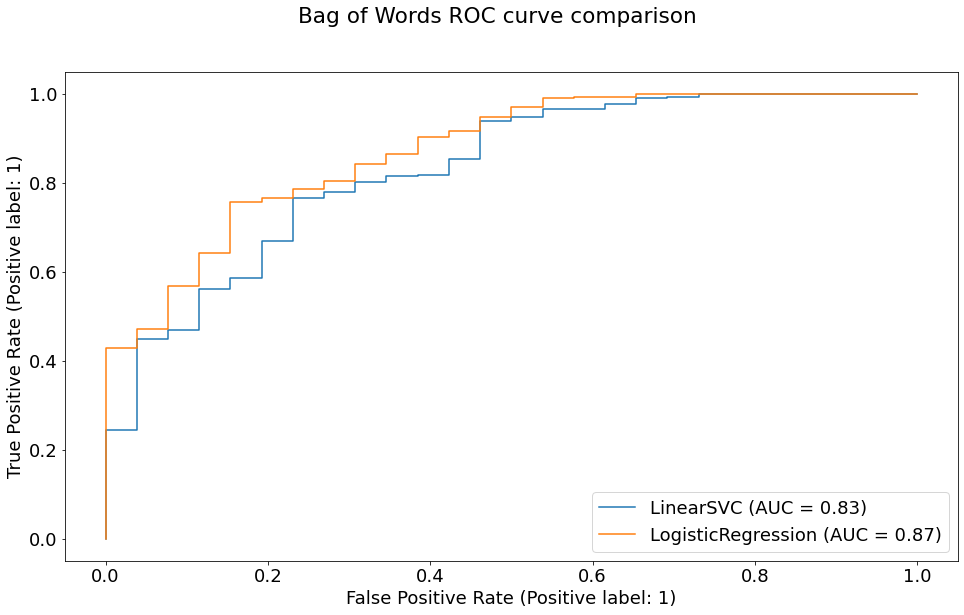

<Figure size 2592x576 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm


clf_model_all_new.fit(X_train, y_train)

clf_disp = metrics.plot_roc_curve(clf_model_all_new, X_test, y_test)  
log_disp = metrics.plot_roc_curve(lr_model_all_new, X_test, y_test, ax = clf_disp.ax_)  

clf_disp.figure_.suptitle("Bag of Words ROC curve comparison")
plt.figure(figsize=(36,8))
plt.show()

### TF-IDF Model

#### TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

In [51]:
# implementing tf-idf model
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# implementating tf-idf model

#Create an object of the calss count vectorizer
tfidf_counts = TfidfVectorizer(tokenizer = word_tokenize,
                               stop_words = noise_words,
                               ngram_range  = (1,1))

tfidf_data = tfidf_counts.fit_transform(Reviews['lowercase_text_reviews'])
tfidf_data

<1686x4260 sparse matrix of type '<class 'numpy.float64'>'
	with 52705 stored elements in Compressed Sparse Row format>

###  Applying Logistic Regression to TF-IDF Features

In [53]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,Reviews['Sentiment_rating'],
                                                                            test_size = 0.2, random_state = 0)

In [54]:
# Setting up the model class
lr_model_tf_idf = LogisticRegression()

# Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

# Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

# Evaluating the model
print("f1 score: ",f1_score(y_test_tfidf, test_pred_lr_all))

f1 score:  0.9600000000000001


### Applying Linear Support Vector Machine to TF-IDF Features

In [55]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

clf_model_all_new = LinearSVC()
clf_model_all_new.fit(X_train_tfidf, y_train_tfidf)

LinearSVC()

In [56]:
test_pred_clf_all = clf_model_all_new.predict(X_test_tfidf)

print("f1 score: ", f1_score(y_test_tfidf,test_pred_clf_all))

f1 score:  0.962962962962963


Comparing the f1 scores, using Linear Support Vector Machine model for Bag of Words and TF-IDF features also shows that this score for TF_IDF with the value of 96.51% is less than BOW with the value of 96.84%.

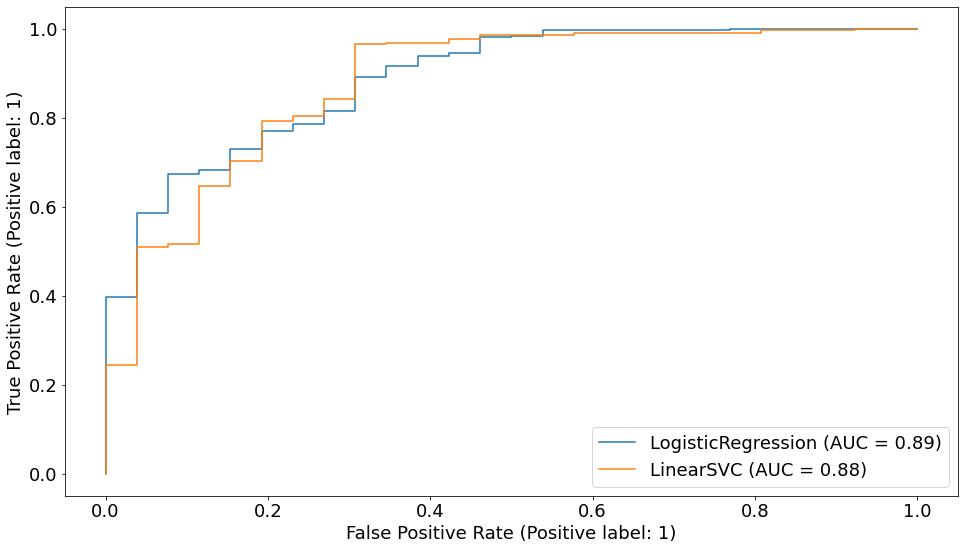

<Figure size 2592x576 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm


lr_model_all_new.fit(X_train_tfidf, y_train_tfidf)

log_disp2 = metrics.plot_roc_curve(lr_model_all_new, X_test_tfidf, y_test_tfidf) 
clf_disp2 = metrics.plot_roc_curve(clf_model_all_new, X_test_tfidf, y_test_tfidf, ax = log_disp2.ax_)

clf_disp.figure_.suptitle("TF-IDF ROC curve comparison")
plt.figure(figsize=(36,8))
plt.show()

# Modeling

In [58]:
# Dividing into train and test sets

#from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data, 
                                                    Reviews['Sentiment_rating'], 
                                                    test_size=0.2,
                                                    random_state=0)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_data, 
    Reviews['Sentiment_rating'], 
    test_size = 0.2, 
    random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.92      1.00      0.96       312

    accuracy                           0.92       338
   macro avg       0.46      0.50      0.48       338
weighted avg       0.85      0.92      0.89       338



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [61]:
print(accuracy_score(y_test, y_predicted))

0.9230769230769231


In [62]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train_tfidf, y_train_tfidf)
y_pred = logreg.predict(X_test_tfidf)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_tfidf, y_test_tfidf)))

Accuracy of logistic regression classifier on test set: 0.93


Text(15.99999999999999, 0.5, 'Actual')

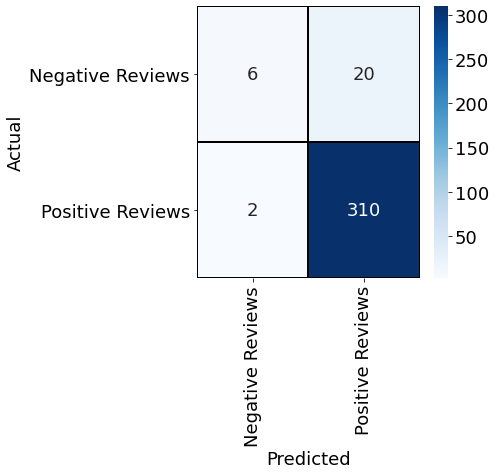

In [63]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Reviews','Positive Reviews'], 
            yticklabels = ['Negative Reviews','Positive Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")